Egyptian Hepatitis C Virus : Classification [30 marks]
Consider a dataset containing various demographic, clinical, and laboratory features of Egyptian patients who underwent treatment dosages for Hepatitis C Virus (HCV) over a period of 18 months.
The dataset includes features such as age, gender, BMI (Body Mass Index), symptoms like fever,
nausea/vomiting, headache, diarrhea, fatigue & generalized bone ache, jaundice, epigastric pain, as
well as laboratory measurements like white blood cell count (WBC), red blood cell count (RBC),
hemoglobin (HGB), platelet count (Plat), and levels of liver enzymes (AST, ALT) at different time
points. Additionally, RNA measurements at different time points (RNA Base, RNA 4, RNA 12, RNA
EOT, RNA EF) are included, which are indicators of the response to treatment. The target variable
for classification is the ”Baseline histological staging”, representing the severity or stage of liver disease
at the beginning of the treatment.
Your task is to perform classification on the ”Baseline histological staging” column using various
classifiers. Feel free to use classifiers such as SVM, KNN, Decision Trees, Ensemble models etc. The
more the merrier !


## importing libraries

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt


## Preprocessing the data

In [2]:
health= pd.read_csv("train_data_question_2.csv")

In [3]:
health.sample(4)

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
862,55,1,29,2,1,1,1,1,2,2,...,89,44,24,963908,540143,9682,55642,789042,8,1
378,59,2,25,2,2,1,1,2,1,1,...,76,113,39,607344,872424,5,5,5,5,2
125,55,1,28,2,1,1,1,2,1,1,...,123,64,44,609182,777031,278122,408,194658,14,4
296,39,1,35,2,1,2,2,2,2,2,...,127,47,23,755278,155670,102988,8196,517426,9,3


## numerical

In [63]:
cols = []
# Assuming 'health' is your DataFrame containing the dataset
for column in health.columns:
    if not health[column].nunique() < 15:  # Checking if the number of unique values is less than 15
        cols.append(column)

In [83]:
numerical_df.columns

Index(['index', 'Age ', 'WBC', 'RBC', 'Plat', 'AST 1', 'ALT 1', 'ALT4',
       'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w', 'RNA Base',
       'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF'],
      dtype='object')

Text(0.5, 0.98, 'Distribution of numerical features before standard scaling')

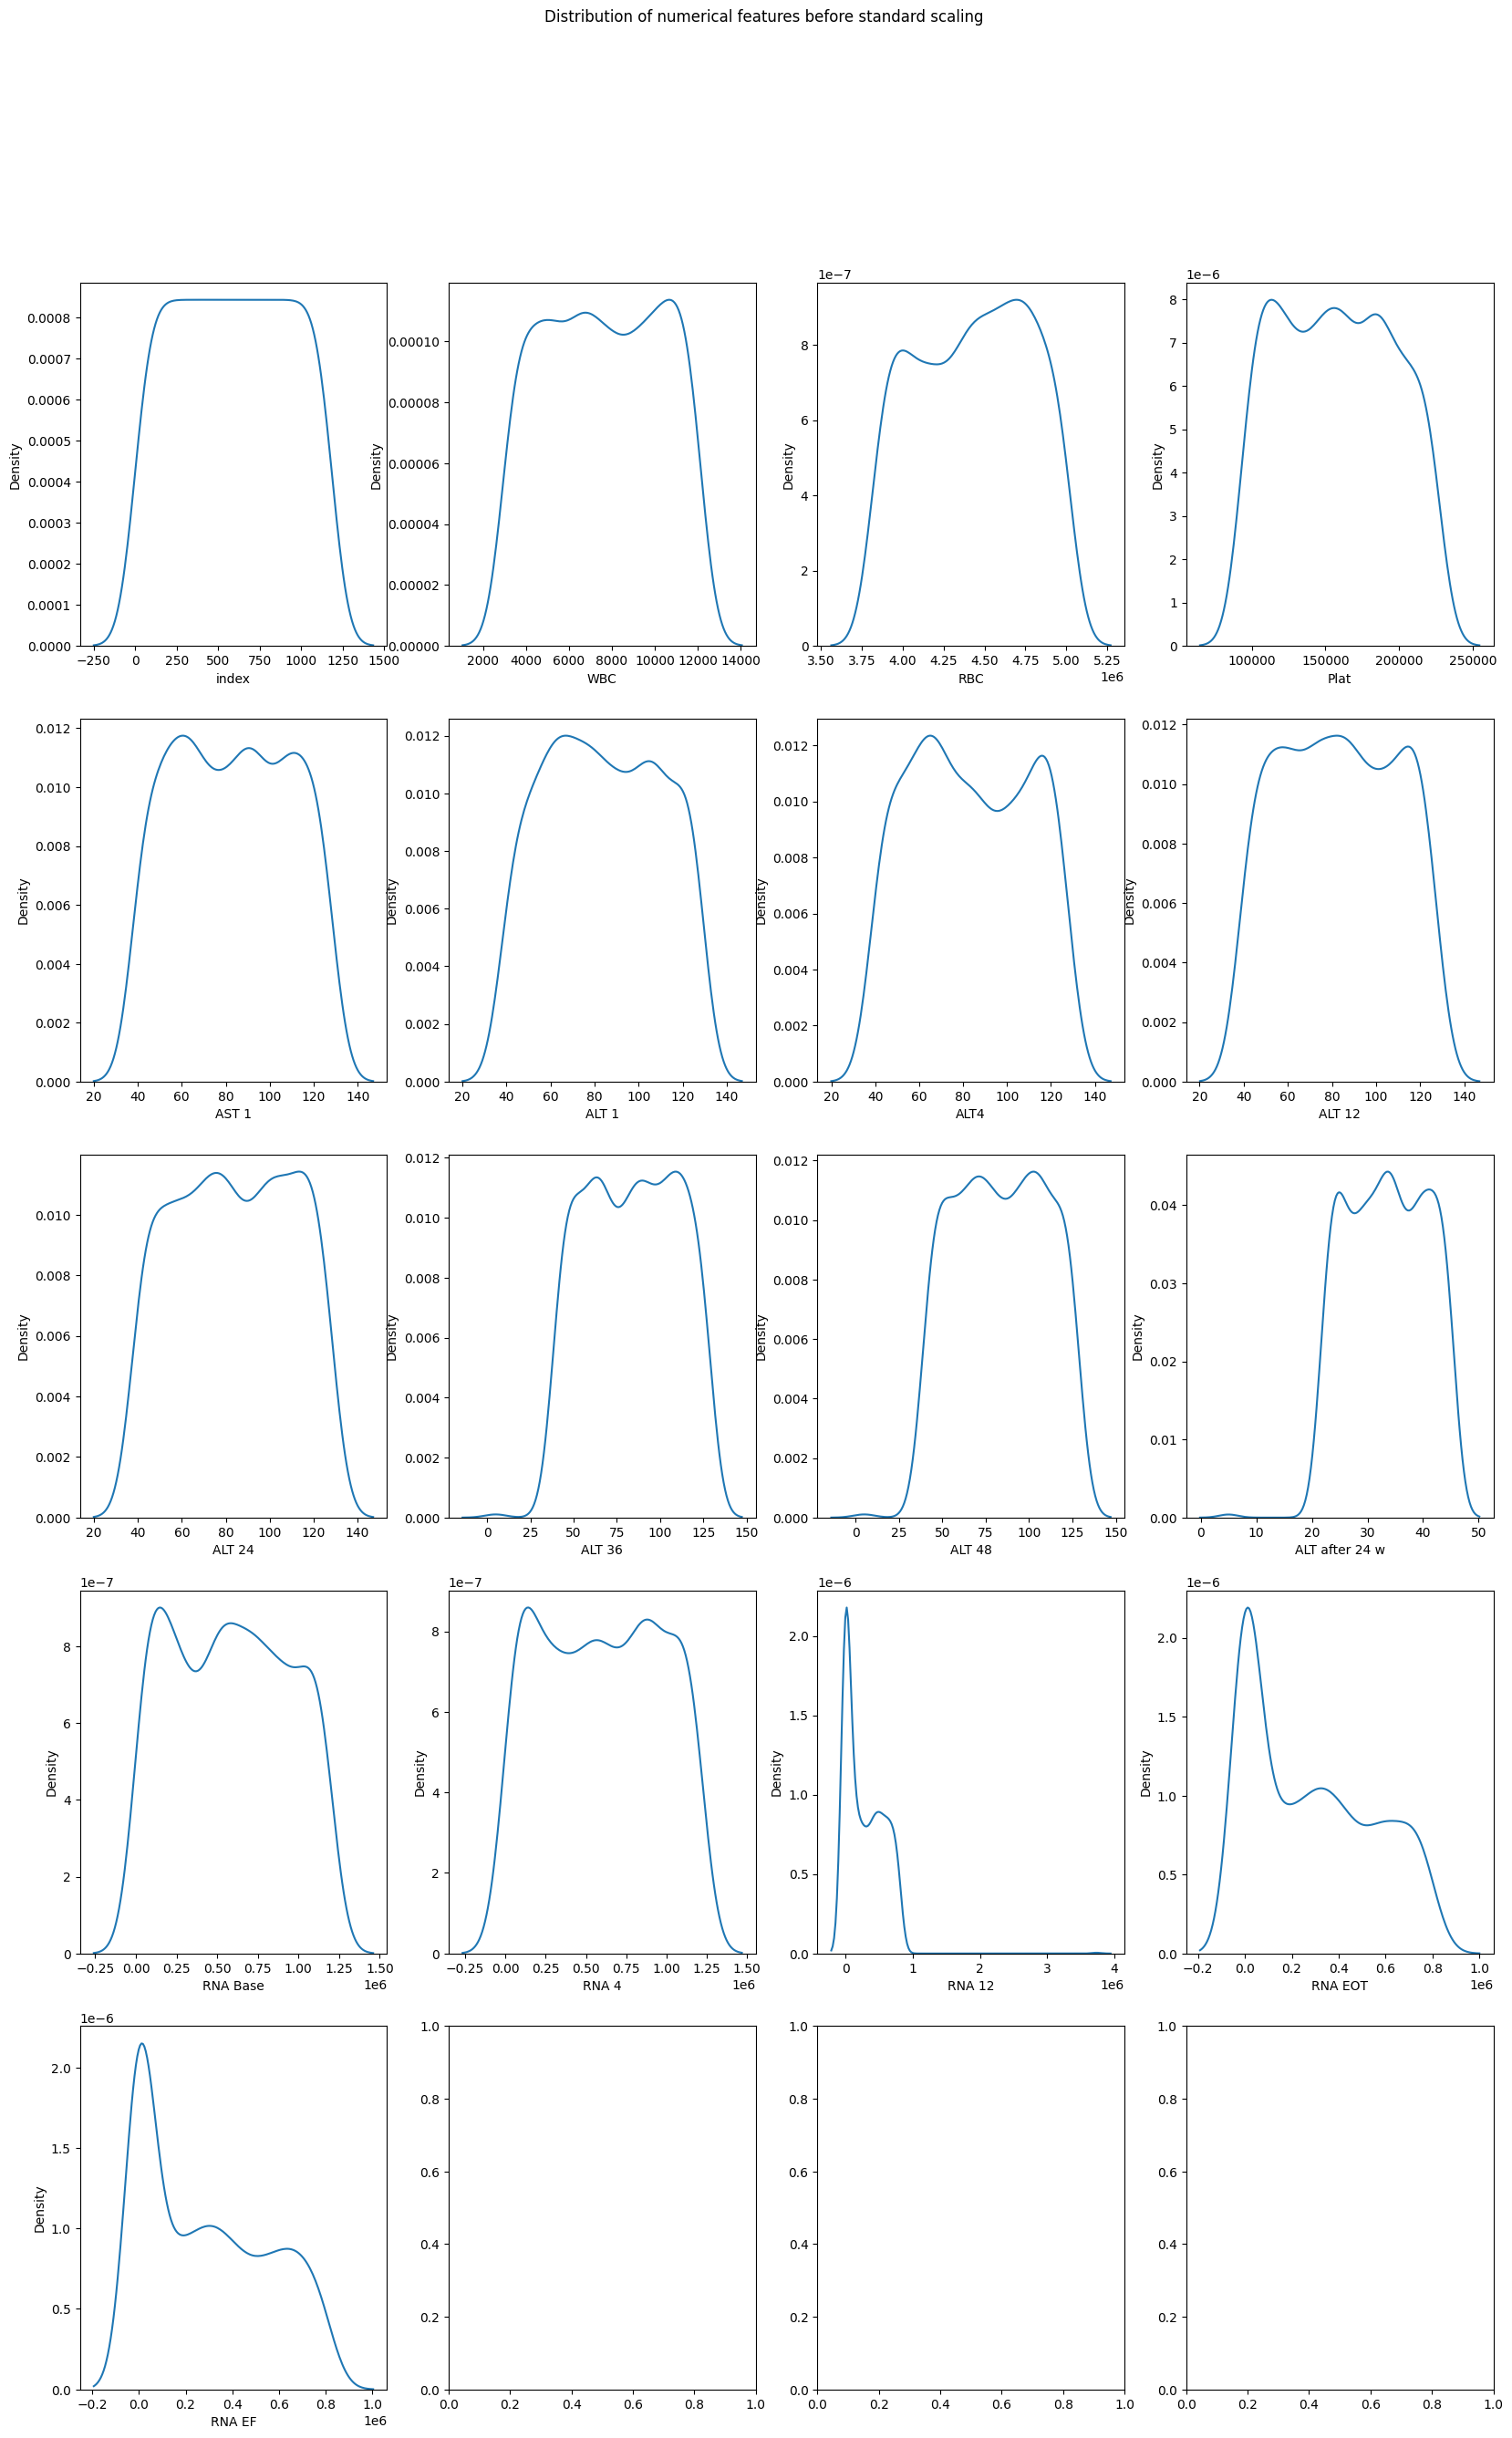

In [85]:
categorical_df = health.drop(columns=cols).reset_index()
numerical_df = health[cols].reset_index()
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# plt.heading("before")
fig,axes = plt.subplots(5,4,figsize = (20,30))
for i,column in enumerate(numerical_df.columns):
  if i==1: continue
  if i>1: i = i-1
  sns.kdeplot(data = numerical_df, x = column,ax = axes[i//4,i%4])
plt.suptitle('Distribution of numerical features before standard scaling')



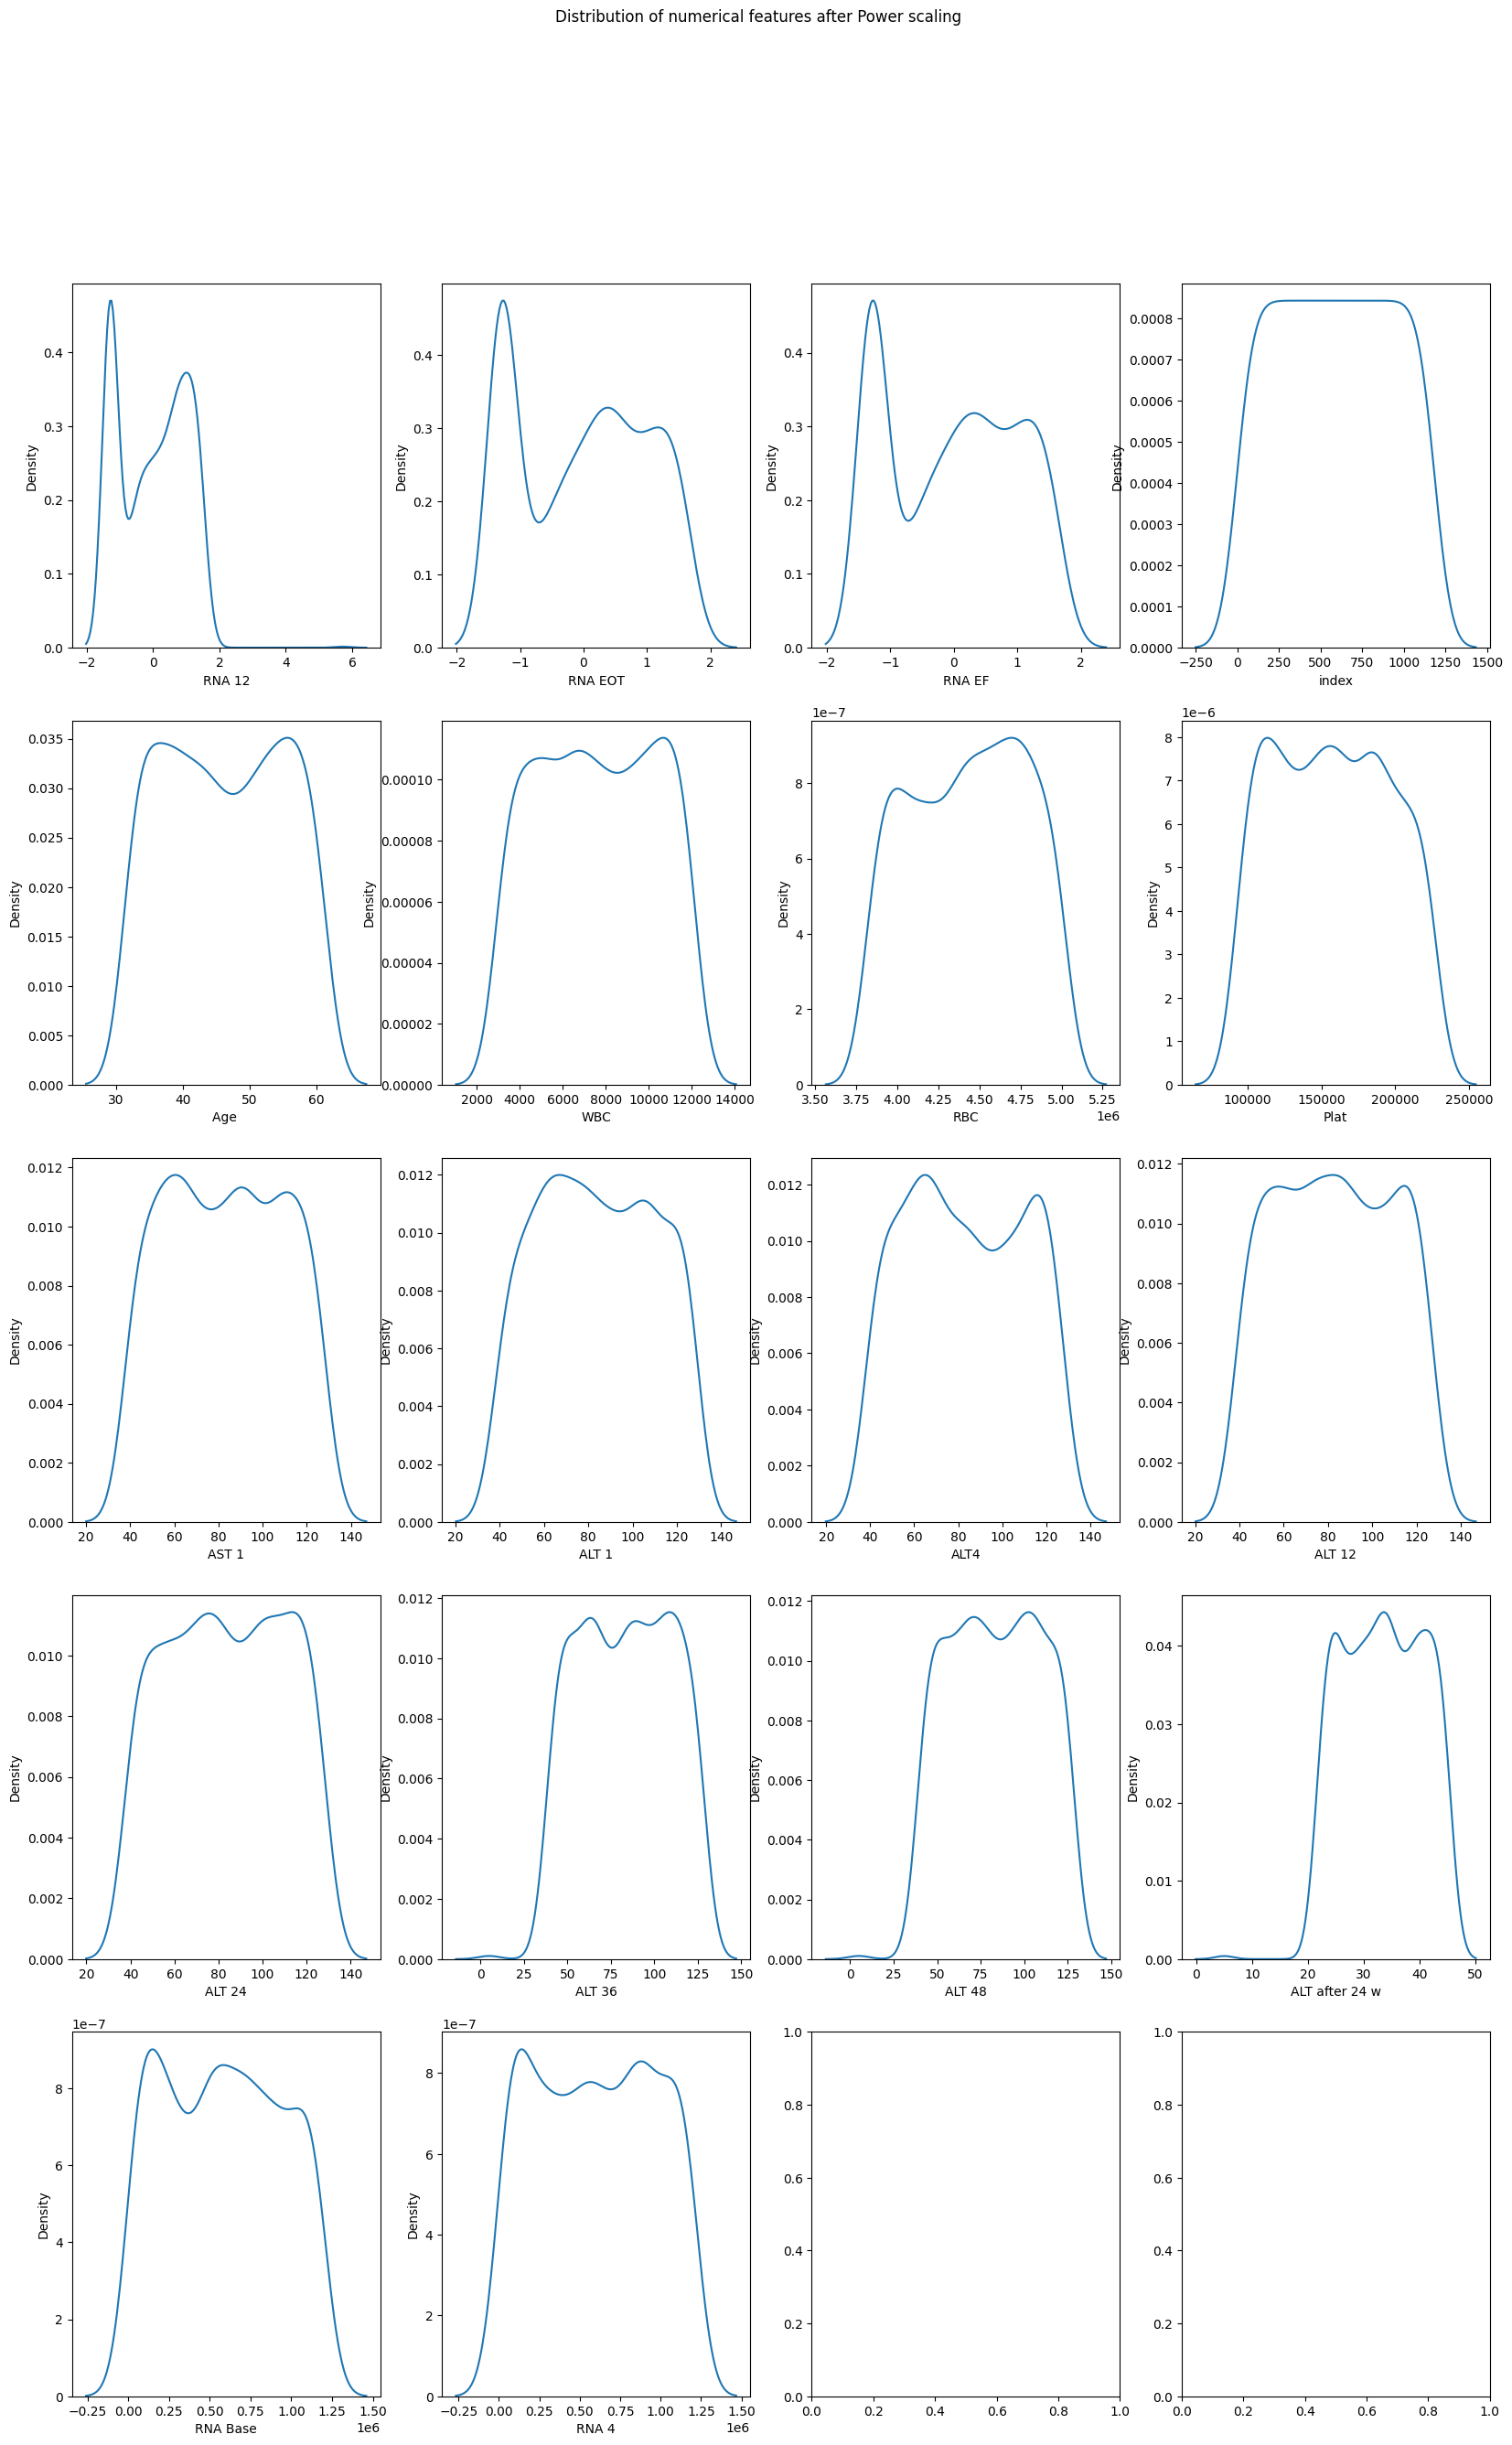

In [89]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
trnf2 = PowerTransformer(method='yeo-johnson')

transformer = ColumnTransformer([
    ('trnf',trnf2,['RNA 12', 'RNA EOT', 'RNA EF']),
       ],remainder='passthrough')


numerical_df = pd.DataFrame(transformer.fit_transform(numerical_df),columns = ['RNA 12', 'RNA EOT', 'RNA EF','index', 'Age ', 'WBC', 'RBC', 'Plat', 'AST 1', 'ALT 1', 'ALT4',
       'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w', 'RNA Base','RNA 4'])

fig,axes = plt.subplots(5,4,figsize = (20,30))
for i,column in enumerate(numerical_df.columns):
  sns.kdeplot(data = numerical_df, x = column,ax = axes[i//4,i%4])
plt.suptitle('Distribution of numerical features after Power scaling')

plt.show()

## Now scalarize for easier calculation

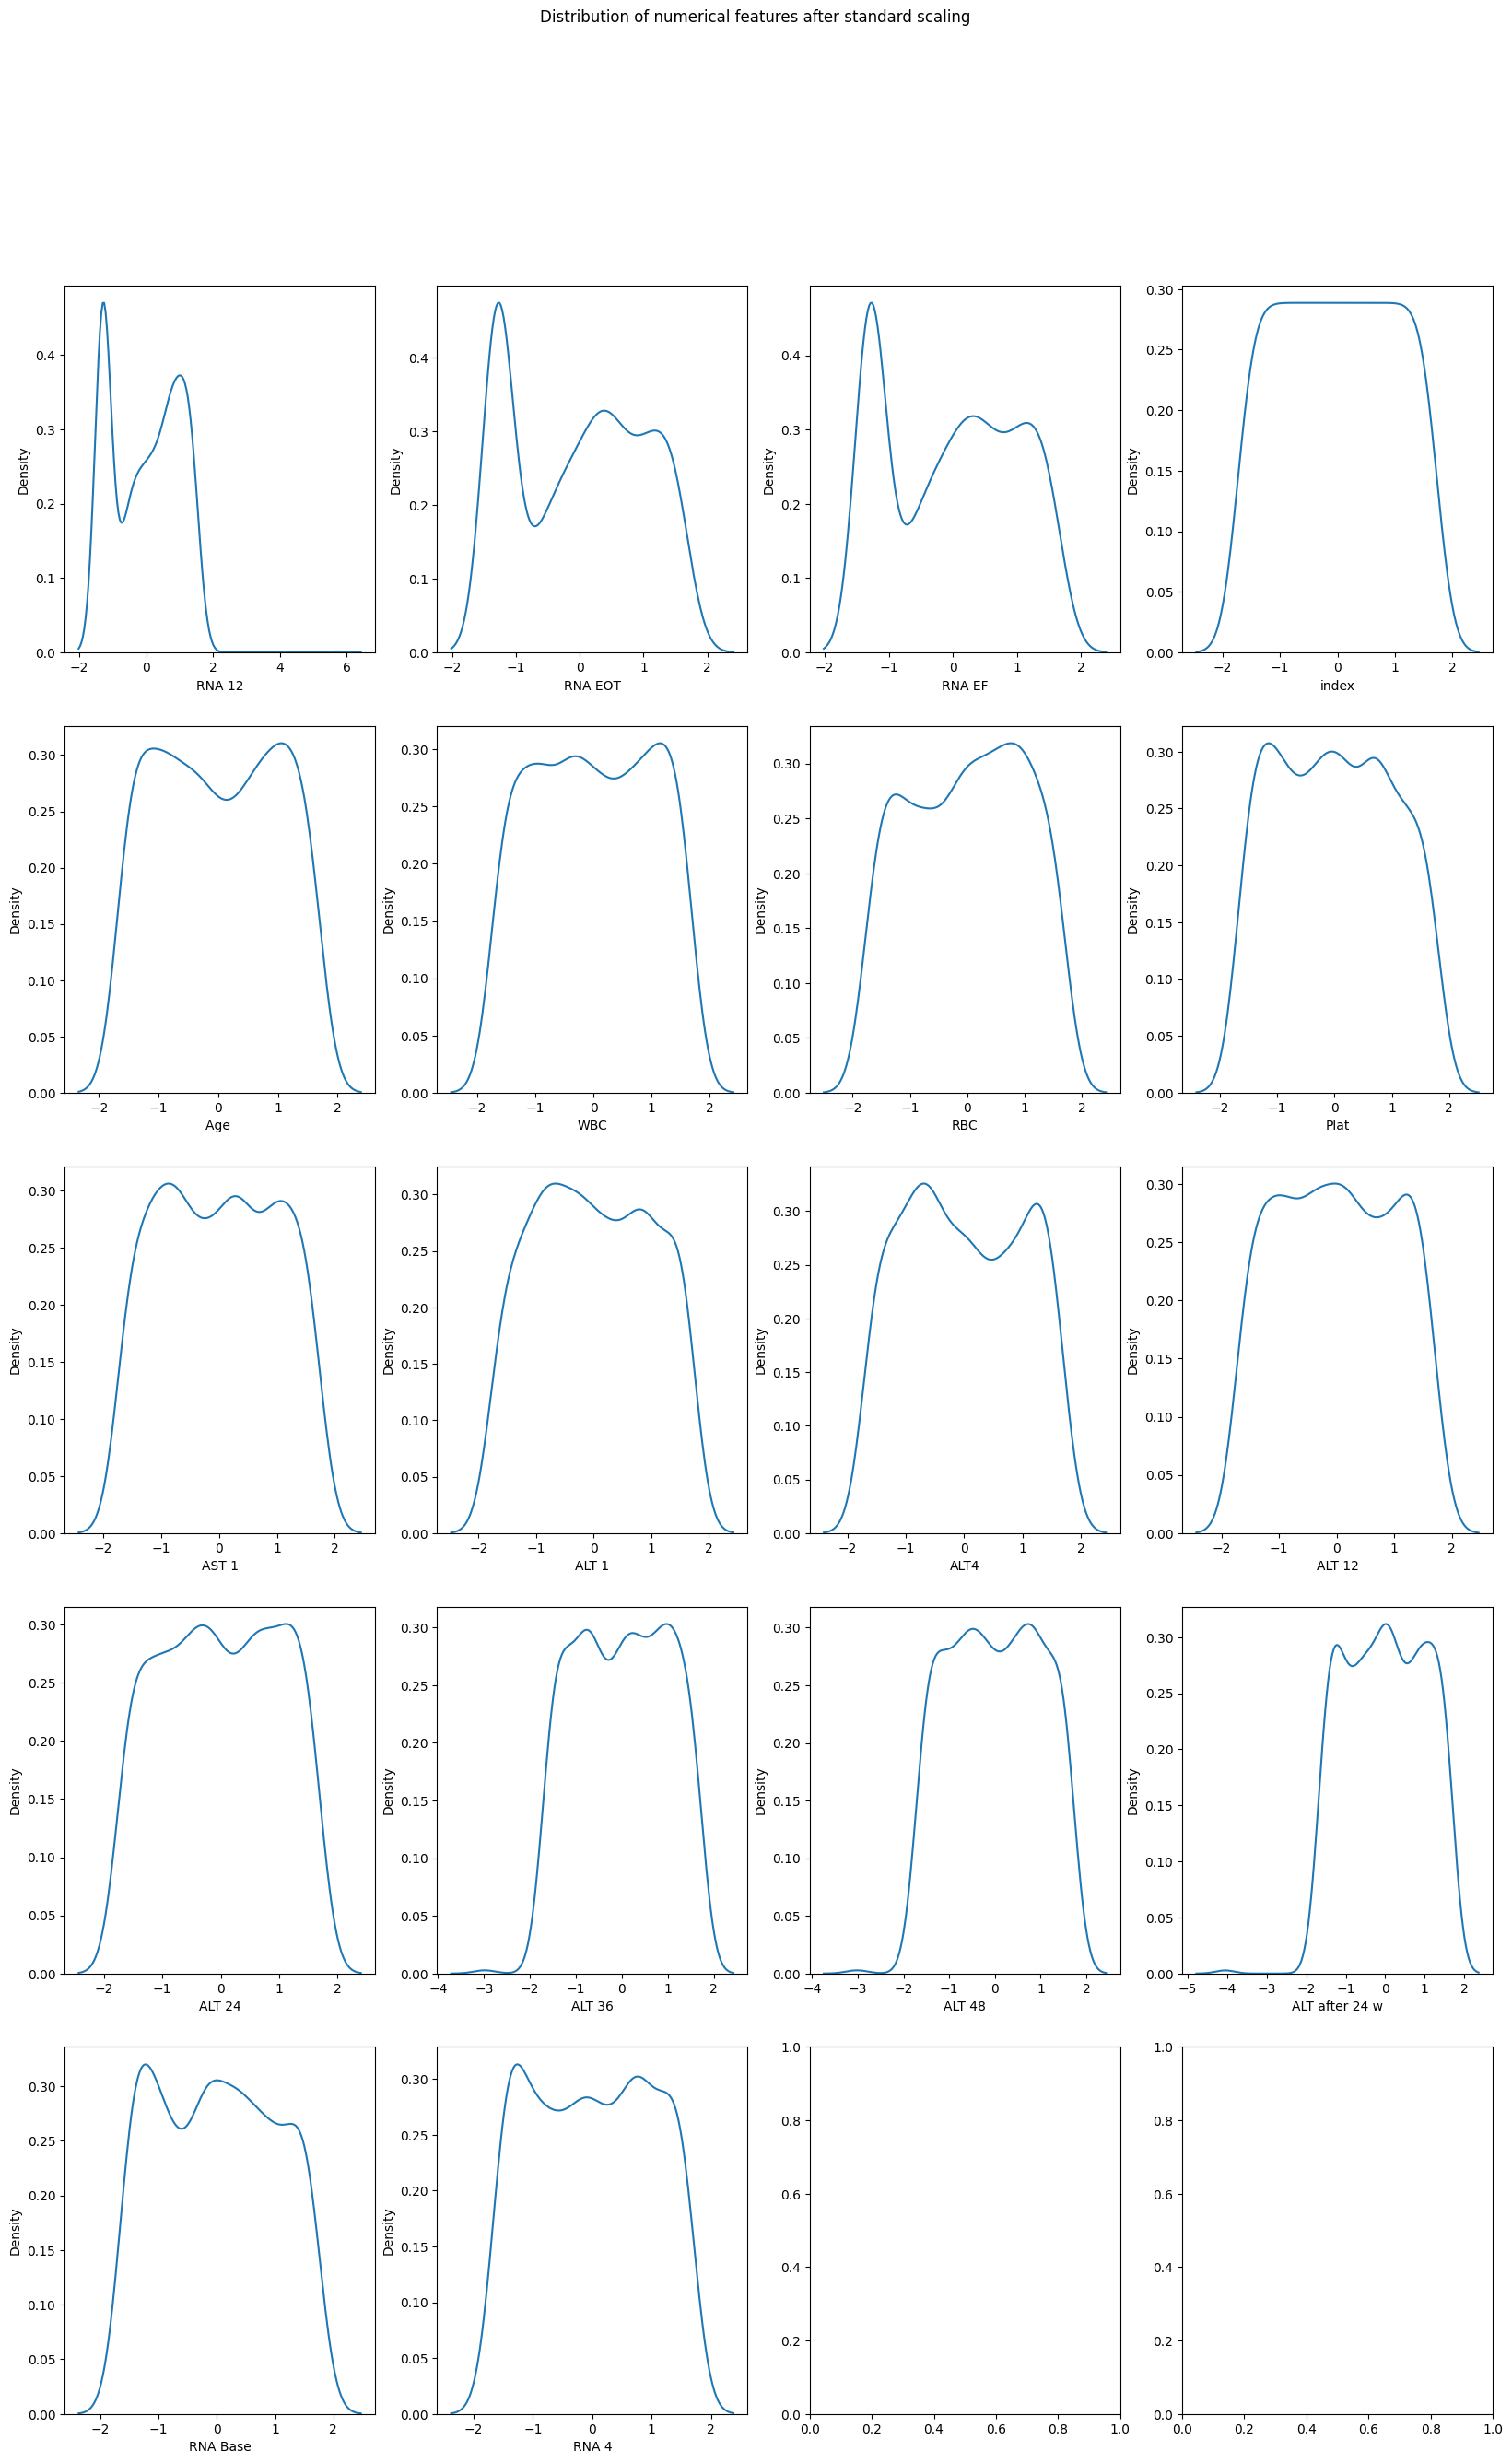

In [90]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

numerical_df = pd.DataFrame(sc.fit_transform(numerical_df),columns= numerical_df.columns)
fig,axes = plt.subplots(5,4,figsize = (20,30))
for i,column in enumerate(numerical_df.columns):
  sns.kdeplot(data = numerical_df, x = column,ax = axes[i//4,i%4])
plt.suptitle('Distribution of numerical features after standard scaling')

plt.show()

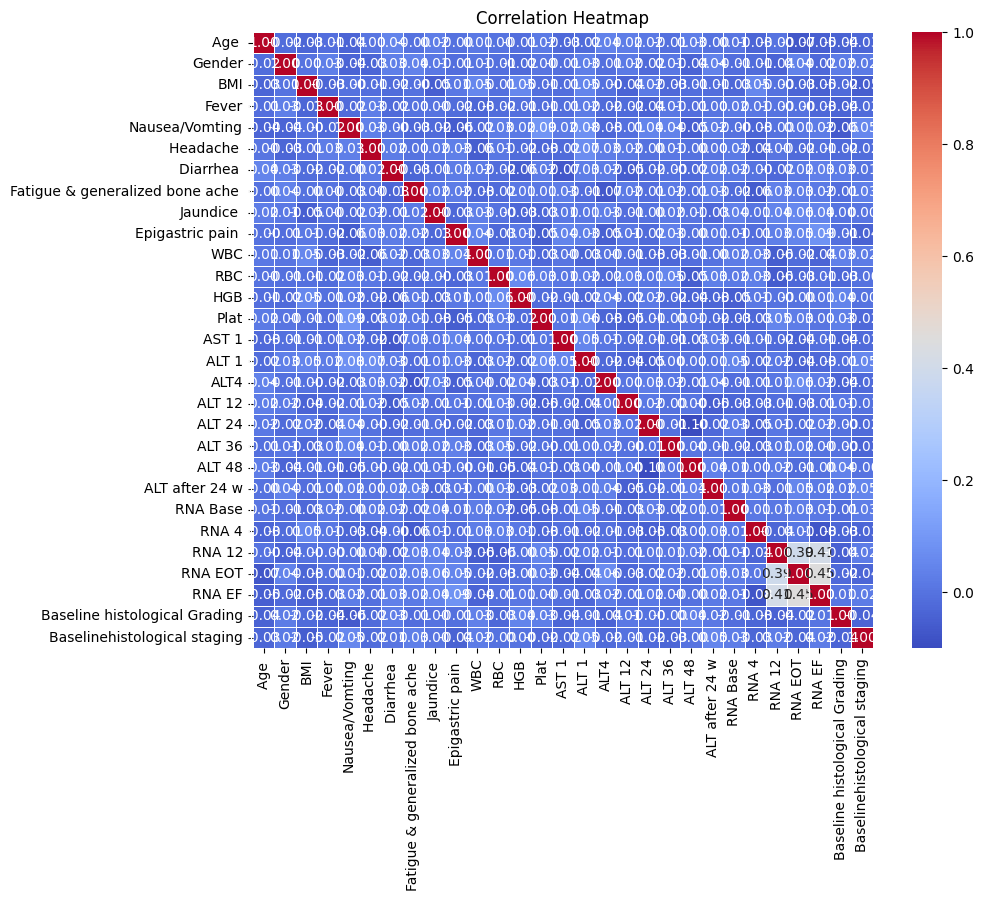

In [15]:


# Calculate correlation matrix
correlation_matrix = health.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


### splitting

In [91]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(health.iloc[:,:-1],health.iloc[:,-1],test_size=0.2,random_state=1)

## Training the model

In [101]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

logistic_reg = LogisticRegression(max_iter=5000)
svm_classifier = SVC()
knn_classifier = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

classifiers = [logistic_reg, decision_tree, random_forest, svm_classifier, knn_classifier]
for clf in classifiers:
    clf.fit(x_train, y_train)

# Step 3: Evaluate Models
accuracies = []
for clf in classifiers:
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"Accuracy for {clf.__class__.__name__}: {acc}")

voting_clf = VotingClassifier(estimators=[('lr', logistic_reg), ('dt', decision_tree),
                                          ('rf', random_forest), ('svc', svm_classifier),
                                          ('knn', knn_classifier)],
                              voting='hard')  # You can choose 'soft' for probabilities
voting_clf.fit(x_train, y_train)

y_pred_ensemble = voting_clf.predict(x_test)
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
print(f"Accuracy for Ensemble: {ensemble_accuracy}")


e:\Data Science\Internship_Assignment\applyin.co\Myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for LogisticRegression: 0.24050632911392406
Accuracy for DecisionTreeClassifier: 0.25738396624472576
Accuracy for RandomForestClassifier: 0.24050632911392406
Accuracy for SVC: 0.20253164556962025
Accuracy for KNeighborsClassifier: 0.2489451476793249


e:\Data Science\Internship_Assignment\applyin.co\Myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for Ensemble: 0.24050632911392406


## Evaluating the model